<a href="https://colab.research.google.com/github/akivaadler/Self-Driving-Cars-Project/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This is a test

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
#!pip install kaggle

In [ ]:
%cd "/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars"

/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars


In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars"

In [ ]:
# ! kaggle datasets download -d kumaresanmanickavelu/lyft-udacity-challenge

In [ ]:
%ls

'carla-image-segmentation-model (1).h5'   datab/   dataD/
 carla-image-segmentation-model.h5        dataB/   datae/
 crfasrnn_keras/                          datac/   dataE/
 dataa/                                   dataC/   kaggle.json
 dataA/                                   datad/   lyft-udacity-challenge.zip


In [ ]:
# ! unzip "lyft-udacity-challenge.zip"

In [ ]:
%ls

'carla-image-segmentation-model (1).h5'   datab/   dataD/
 carla-image-segmentation-model.h5        dataB/   datae/
 crfasrnn_keras/                          datac/   dataE/
 dataa/                                   dataC/   kaggle.json
 dataA/                                   datad/   lyft-udacity-challenge.zip


In [ ]:
# Create a list that contains all the paths to all directories in the main directory (a list that contains the path to dataA, dataB, dataC, dataD, and dataE)

DATASET_PATH = "/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/"

image_path = [DATASET_PATH+"data"+i+"/"+"data"+i+"/CameraRGB/" for i in ['A', 'B', 'C', 'D', 'E']]
mask_path = [DATASET_PATH+"data"+i+"/"+"data"+i+"/CameraSeg/" for i in ['A', 'B', 'C', 'D', 'E']]

In [ ]:
image_path

['/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraRGB/',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataB/dataB/CameraRGB/',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataC/dataC/CameraRGB/',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataD/dataD/CameraRGB/',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataE/dataE/CameraRGB/']

In [ ]:
mask_path 

['/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraSeg/',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataB/dataB/CameraSeg/',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataC/dataC/CameraSeg/',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataD/dataD/CameraSeg/',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataE/dataE/CameraSeg/']

In [ ]:
# Create a function to iterate over all the direcory paths where our data are located (list in 2.1.1.) and return the list of the image paths in those directories

def list_image_paths(directory_paths):
    image_paths = []

    for directory in directory_paths:
        image_filenames = os.listdir(directory)
        sorted_image_filenames = sorted(image_filenames)
 
        for image_filename in sorted_image_filenames:
            image_paths.append(directory + image_filename)
            
    return image_paths

In [ ]:
# Create lists of image and mask paths

image_paths = list_image_paths(image_path) 
mask_paths = list_image_paths(mask_path)
number_of_images, number_of_masks = len(image_paths), len(mask_paths)

print(f"1. There are {number_of_images} images and {number_of_masks} masks in our dataset")
print(f"2. An example of an image path is: \n {image_paths[0]}")
print(f"3. An example of a mask path is: \n {mask_paths[0]}")

1. There are 5000 images and 5000 masks in our dataset
2. An example of an image path is: 
 /content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraRGB/02_00_000.png
3. An example of a mask path is: 
 /content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraSeg/02_00_000.png


In [ ]:
image_paths[0:10]

['/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraRGB/02_00_000.png',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraRGB/02_00_001.png',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraRGB/02_00_010.png',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraRGB/02_00_011.png',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraRGB/02_00_020.png',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraRGB/02

In [ ]:
mask_paths[0:10]

['/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraSeg/02_00_000.png',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraSeg/02_00_001.png',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraSeg/02_00_010.png',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraSeg/02_00_011.png',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraSeg/02_00_020.png',
 '/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/dataA/dataA/CameraSeg/02

____SAMPLE IMAGE 1 DETAILS____
Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (600, 800, 3)
Image Height 600
Image Width 800
Dimension of Image 3
Image size 1440000
Maximum RGB value in this image 217
Minimum RGB value in this image 0


____SAMPLE MASK 1 DETAILS____
Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (600, 800)
Image Height 600
Image Width 800
Dimension of Image 2
Image size 480000
Maximum RGB value in this image 12
Minimum RGB value in this image 0
Found class: Unlabeled
Found class: Fence
Found class: Pole
Found class: RoadLine
Found class: Road
Found class: SideWalk
Found class: Vegetation
Found class: Vehicles
Found class: TrafficSign


colors [(0.267004, 0.004874, 0.329415, 1.0), (0.267968, 0.223549, 0.512008, 1.0), (0.157729, 0.485932, 0.558013, 1.0), (0.127568, 0.566949, 0.550556, 1.0), (0.126326, 0.644107, 0.525311, 1.0), (0.20803, 0.718701, 0.472873, 1.0), (0.369214, 0.788888, 0.382914, 1.0), (0.565498, 0.84243, 0.262

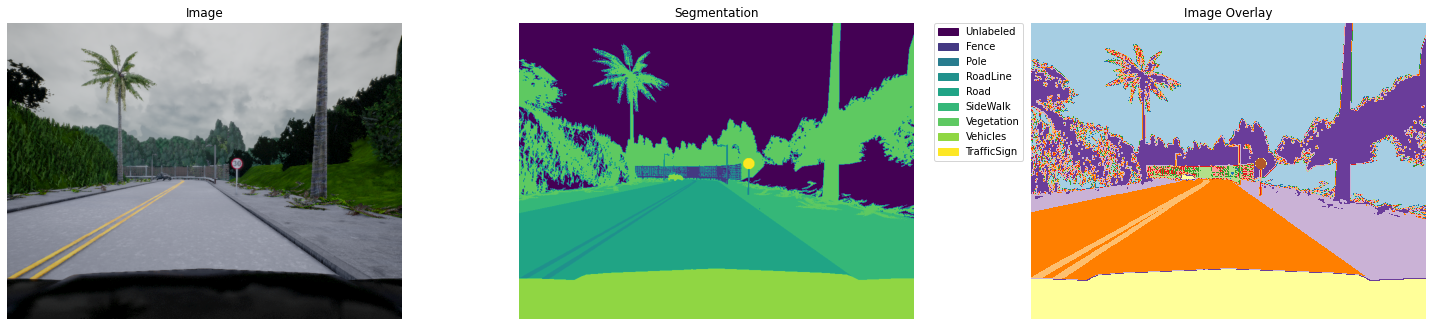

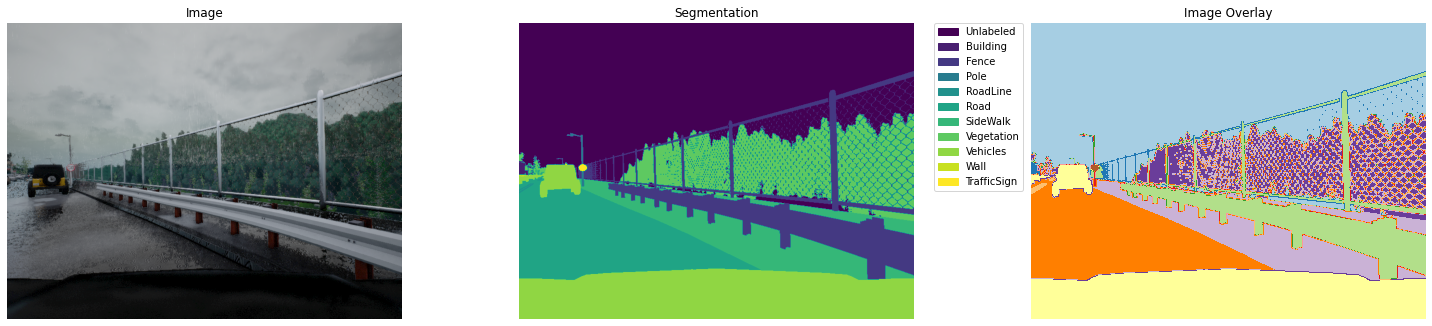

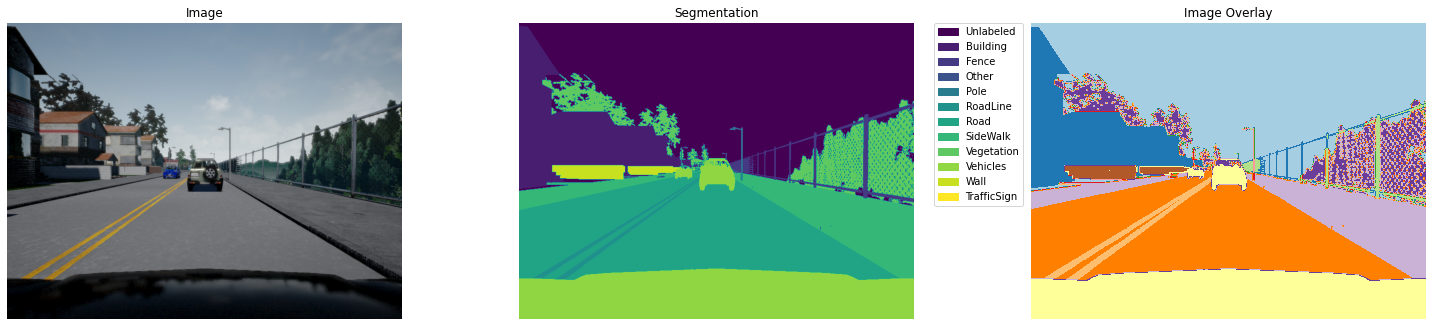

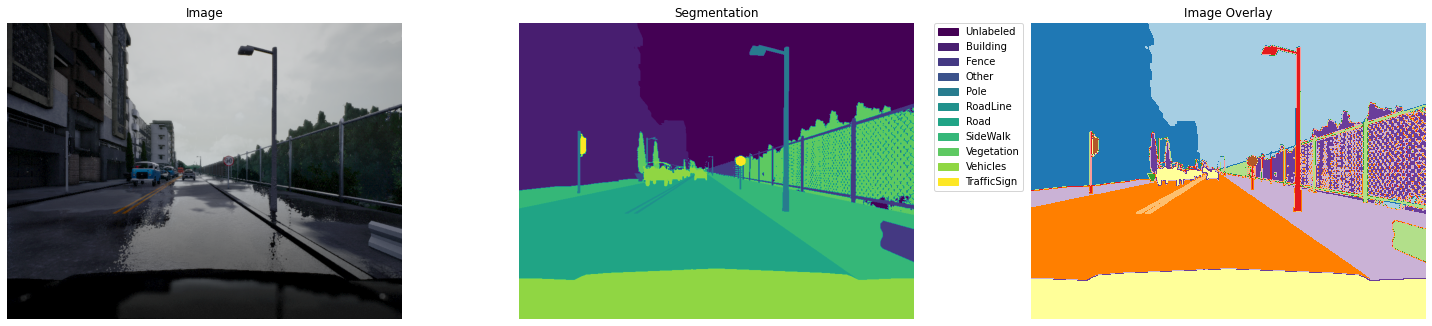

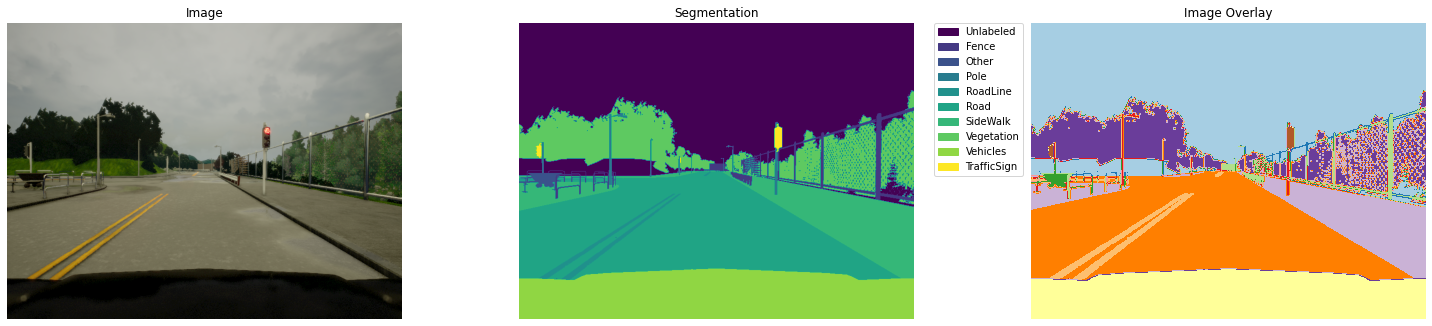

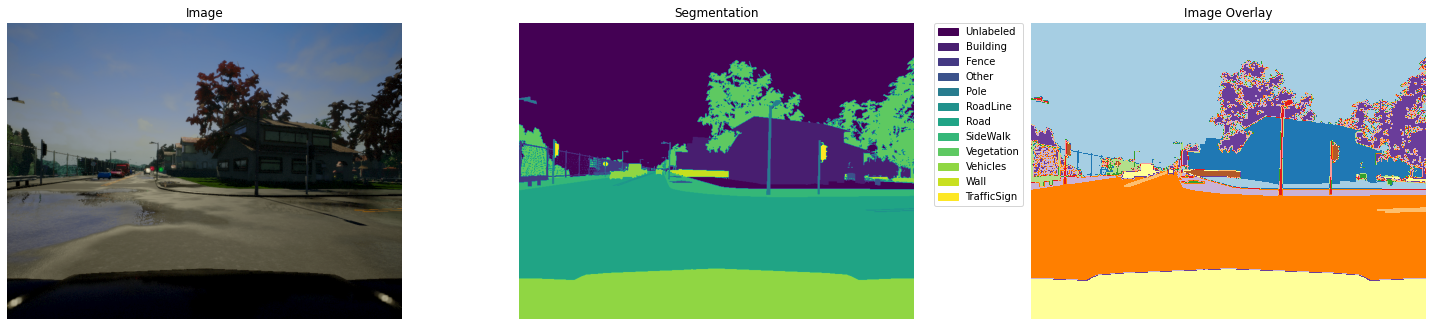

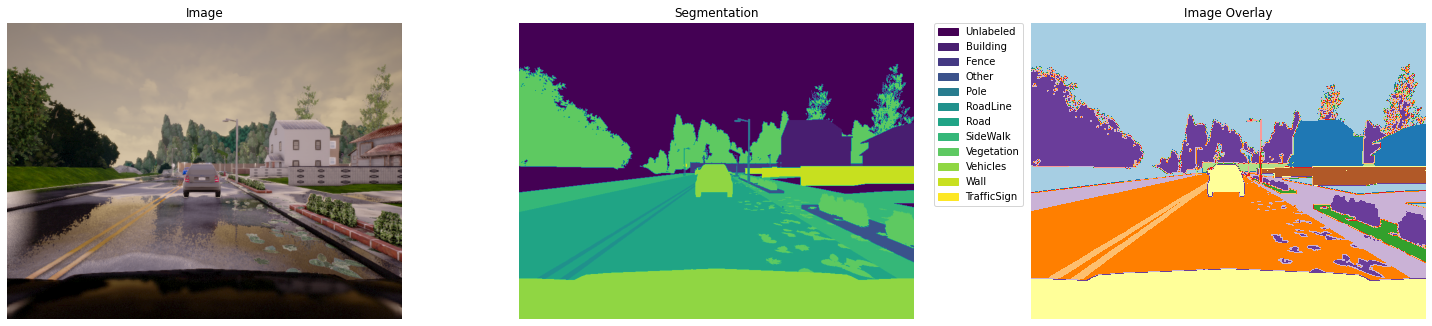

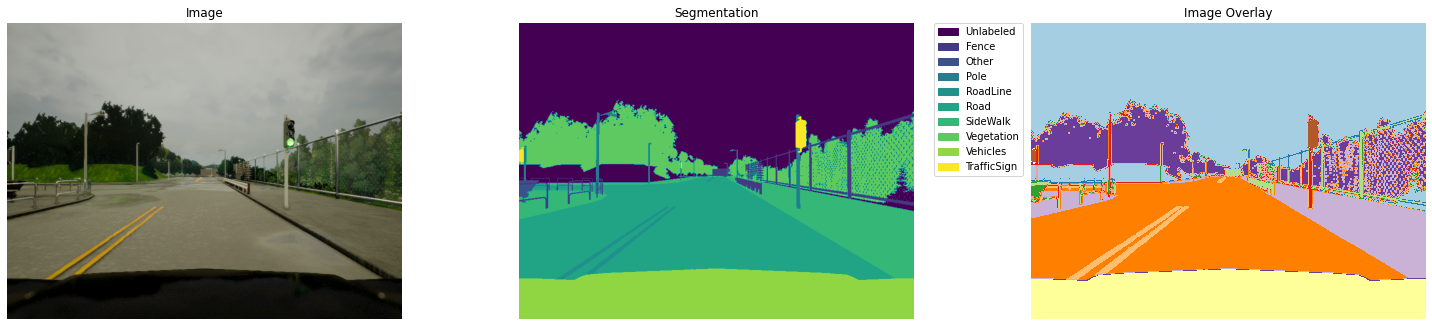

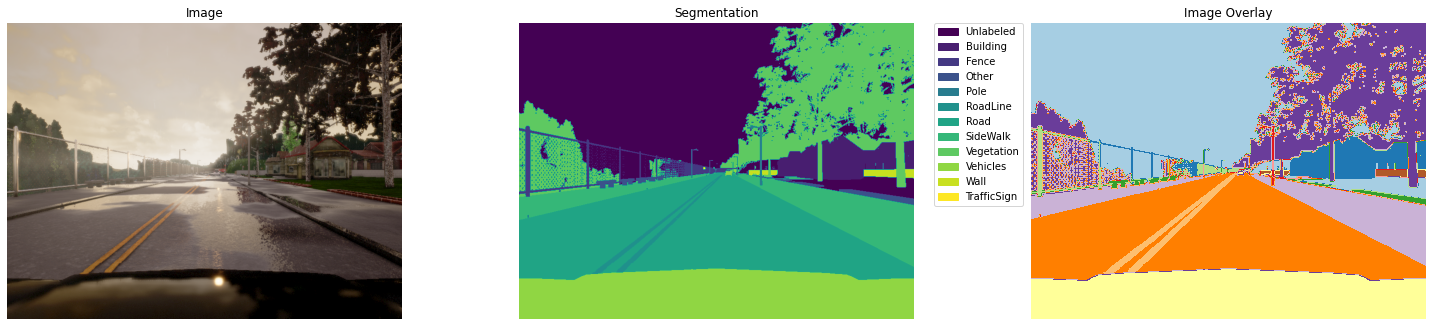

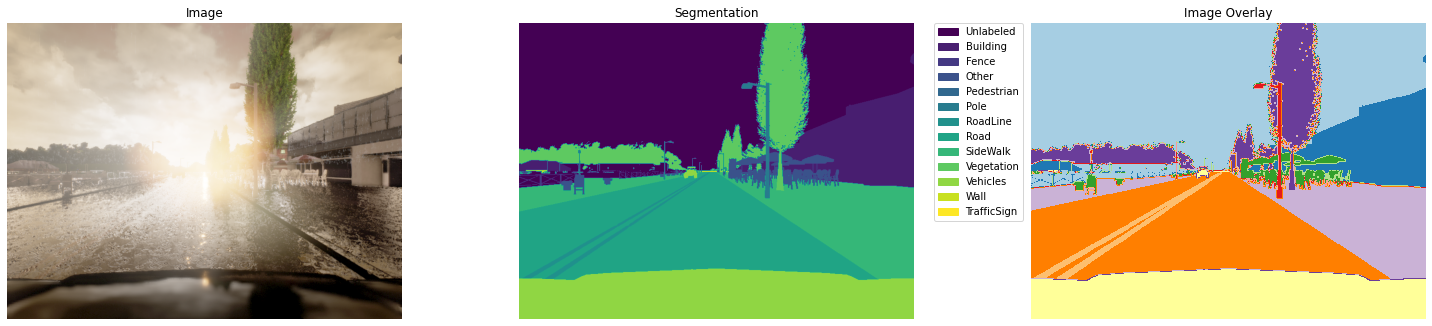

In [ ]:
# Preview random masked and unmasked images by reading them from their paths

import random
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

number_of_samples = len(image_paths)
label_map = {0: 'Unlabeled', 1: 'Building', 2: 'Fence', 3: 'Other', 
                             4: 'Pedestrian', 5: 'Pole', 6: 'RoadLine', 7: 'Road', 8: 'SideWalk',
                             9: 'Vegetation', 10: 'Vehicles', 11: 'Wall', 12: 'TrafficSign'}
                            #  , 13: 'Sky', 14: 'Ground', 15: 'Bridge', 16: 'RailTrack', 17: 'GuardRail',
                            #  18: 'TrafficLight', 19: 'Static', 20: 'Dynamic', 21: 'Water', 22: 'Terrain'}

for i in range(10):
    N = random.randint(0, number_of_samples - 1)

    img = imageio.imread(image_paths[N])
    mask = imageio.imread(mask_paths[N])
    mask = np.array([max(mask[i, j]) for i in range(mask.shape[0]) for j in range(mask.shape[1])]).reshape(img.shape[0], img.shape[1])
    
    print(f'____SAMPLE IMAGE {i + 1} DETAILS____')
    print('Type of the image : ' , type(img)) 
    print('Shape of the image : {}'.format(img.shape)) 
    print('Image Height {}'.format(img.shape[0])) 
    print('Image Width {}'.format(img.shape[1])) 
    print('Dimension of Image {}'.format(img.ndim))
    print('Image size {}'.format(img.size)) 
    print('Maximum RGB value in this image {}'.format(img.max())) 
    print('Minimum RGB value in this image {}'.format(img.min()))
    print('\n')

    print(f'____SAMPLE MASK {i + 1} DETAILS____')
    print('Type of the image : ' , type(mask)) 
    print('Shape of the image : {}'.format(mask.shape)) 
    print('Image Height {}'.format(mask.shape[0])) 
    print('Image Width {}'.format(mask.shape[1])) 
    print('Dimension of Image {}'.format(mask.ndim))
    print('Image size {}'.format(mask.size)) 
    print('Maximum RGB value in this image {}'.format(mask.max())) 
    print('Minimum RGB value in this image {}'.format(mask.min()))

    used_classes = np.unique(mask)
    for cls in used_classes:
        print("Found class: {}".format(label_map[cls]))

    print('\n')    

    fig, arr = plt.subplots(1, 3, figsize=(20, 8))
    arr[0].imshow(img)
    arr[0].set_title('Image')
    arr[0].axis("off")

    im = arr[1].imshow(mask)
    arr[1].set_title('Segmentation')
    arr[1].axis("off")
    # get the colors of the values, according to the colormap used by imshow
    colors = [im.cmap(im.norm(cls)) for cls in used_classes]
    # create a patch (proxy artist) for every color
    print("colors {}".format(colors))
    print("used_classes {}".format([int(cls) for cls in used_classes]))
    patches = [mpatches.Patch(color=colors[j], label="{}".format(label_map[int(cls)])) for j, cls in enumerate(used_classes)]
    # put those patched as legend-handles into the legend
    arr[1].legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    arr[2].imshow(mask, cmap='Paired')
    arr[2].set_title('Image Overlay')
    arr[2].axis("off")

    fig.tight_layout()
    fig.show()

In [ ]:
# !pip install easyimages==0.8.6

In [ ]:
# from easyimages import EasyImage, EasyImageList, bbox

In [ ]:
# display_of_images = EasyImageList.from_folder('./dataa/dataA/CameraRGB/')
# display_of_images

In [ ]:
# import IPython
# IPython.display.HTML(display_of_images.html(by_class=True))

# # display_of_images.html(sample=100, size=100)
# # display_of_images.html(by_class=True)

In [ ]:
# Split the image and mask paths into training, validation, and test sets
from sklearn.model_selection import train_test_split

X = image_paths
y = mask_paths

# split the image paths into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

# Keep part of the validation set as test set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111111, random_state=0)

print(f'There are {len(X_train)} images in the Training Set')
print(f'There are {len(X_val)} images in the Validation Set')
print(f'There are {len(X_test)} images in the Test Set')

There are 4000 images in the Training Set
There are 500 images in the Validation Set
There are 500 images in the Test Set


In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
else:
  print(tf.__version__)
  print(tf.test.gpu_device_name())
  print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
  print('Found GPU at: {}'.format(device_name))

2.7.0
/device:GPU:0
Num GPUs Available:  1
Found GPU at: /device:GPU:0


In [ ]:
# Create a function to read image and mask paths and return equivalent arrays

def read_image(image_path, mask_path):
    
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, (256, 256), method='nearest')

    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=3)
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
    mask = tf.image.resize(mask, (256, 256), method='nearest')
    
    return image, mask

In [ ]:
# Create a data generator function to read and load images and masks in batches

def data_generator(image_paths, mask_paths, buffer_size, batch_size):
    
    image_list = tf.constant(image_paths) 
    mask_list = tf.constant(mask_paths)
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(read_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.cache().shuffle(buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    
    return dataset

In [ ]:
# Create data pipelines for the training, validation and test sets using both functions

batch_size = 32
buffer_size = 512

train_dataset = data_generator(X_train, y_train, buffer_size, batch_size)
validation_dataset = data_generator(X_val, y_val, buffer_size, batch_size)
test_dataset = data_generator(X_test, y_test, buffer_size, batch_size)

In [ ]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Activation, Input, Conv2D, MaxPooling2D, BatchNormalization, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model, load_model

In [ ]:
# Define a function for an encoding block (This function will return the next layer output and the skip connection output for the corresponding block in the model)

def encoding_block(inputs, filters, dropout_probability=0, max_pooling=True):

    """
    Convolutional encoding/downsampling block
    
    Arguments:
        inputs -- Input tensor
        filters -- Number of filters for the convolutional layers
        max_pooling -- Use MaxPooling2D to reduce the spatial dimensions of the output volume
    Returns: 
        next_layer, skip_connection --  Next layer and skip connection inputs 
    """
    
    C = Conv2D(filters, 3, padding="same", kernel_initializer="he_normal")(inputs)
    C = BatchNormalization()(C)
    C = Activation("relu")(C)

    C = Conv2D(filters, 3, padding="same", kernel_initializer="he_normal")(C)
    C = BatchNormalization()(C)
    C = Activation("relu")(C)

    skip_connection = C  # Set aside residual
    
    # if max_pooling is True, add a MaxPooling2D with 2x2 pool_size
    if max_pooling:
        next_layer = MaxPooling2D(pool_size=(2, 2))(C)        
    else:
        next_layer = C
            
    return next_layer, skip_connection

In [ ]:
# Define a function for a decoding block (This function will merge the skip-connection input with the previous layer, process it, and return an output)

def decoding_block(inputs, skip_connection_input, filters):
    """
    Convolutional decoding/upsampling block
    
    Arguments:
        inputs -- Input tensor from previous layer
        skip_connection_input -- Input tensor from previous skip layer
        filters -- Number of filters for the convolutional layers
    Returns: 
        C -- Tensor output
    """

    CT = Conv2DTranspose(filters, 3, strides=(2,2), padding="same", kernel_initializer="he_normal")(inputs)
    
    residual_connection = concatenate([CT, skip_connection_input], axis=3)

    C = Conv2D(filters, 3, padding="same", kernel_initializer="he_normal")(residual_connection)
    C = BatchNormalization()(C)
    C = Activation("relu")(C)
    
    C = Conv2D(filters, 3, padding="same", kernel_initializer="he_normal")(C)
    C = BatchNormalization()(C)
    C = Activation("relu")(C)    
  
    return C

In [ ]:
# Develop a model using both the encoding and decoding blocks output

def unet_model(input_size, filters, n_classes):
    """
    Unet model
    
    Arguments:
        input_size -- Input shape 
        filters -- Number of filters for the convolutional layers
        n_classes -- Number of output classes
    Returns: 
        model -- tf.keras.Model
    """
    inputs = Input(input_size)
        
    # Contracting Path (encoding)
    C1, S1 = encoding_block(inputs, filters, max_pooling=True)
    C2, S2 = encoding_block(C1, filters * 2, max_pooling=True)
    C3, S3 = encoding_block(C2, filters * 4, max_pooling=True)
    C4, S4 = encoding_block(C3, filters * 8, max_pooling=True)
    
    C5, S5 = encoding_block(C4, filters * 16, max_pooling=False)
    
    # Expanding Path (decoding)
    U6 = decoding_block(C5, S4, filters * 8)
    U7 = decoding_block(U6, S3,  filters * 4)
    U8 = decoding_block(U7, S2,  filters = filters * 2)
    U9 = decoding_block(U8, S1,  filters = filters)

    C10 = Conv2D(filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(U9)

    # Add a Conv2D layer with n_classes filter, kernel size of 1 and a 'same' padding
    C11 = Conv2D(filters = n_classes, kernel_size = (1,1), activation='sigmoid', padding='same')(C10)
    
    model = Model(inputs=inputs, outputs=C11)

    return model

In [ ]:
img_height = 256
img_width = 256
num_channels = 3
filters_1 = 32
n_classes_1 = 13

model = unet_model((img_height, img_width, num_channels), filters=filters_1, n_classes = n_classes_1)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5, mode='min',
                               restore_best_weights=True
                               )
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=1e-1, patience=5, verbose=1, min_lr = 2e-6)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.001,
    verbose=2
    )
# batch_size = 32
epochs = 25

# filepath = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
filepath = 'carla-image-segmentation-model.h5'

checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

In [ ]:
history = model.fit(train_dataset, 
                    validation_data = validation_dataset, 
                    epochs = epochs, 
                    verbose=1, 
                    callbacks = [checkpoint, early_stopping, reduce_lr], 
                    batch_size = batch_size, 
                    shuffle = True)

Epoch 1/25
125/125 [==============================] - ETA: 0s - loss: 0.5910 - accuracy: 0.8271
Epoch 00001: val_loss improved from inf to 1.50697, saving model to carla-image-segmentation-model.h5
125/125 [==============================] - 634s 5s/step - loss: 0.5910 - accuracy: 0.8271 - val_loss: 1.5070 - val_accuracy: 0.6839 - lr: 0.0010
Epoch 2/25
125/125 [==============================] - ETA: 0s - loss: 0.2231 - accuracy: 0.9321
Epoch 00002: val_loss improved from 1.50697 to 1.14123, saving model to carla-image-segmentation-model.h5
125/125 [==============================] - 52s 413ms/step - loss: 0.2231 - accuracy: 0.9321 - val_loss: 1.1412 - val_accuracy: 0.7300 - lr: 0.0010
Epoch 3/25
125/125 [==============================] - ETA: 0s - loss: 0.1652 - accuracy: 0.9489
Epoch 00003: val_loss improved from 1.14123 to 0.51601, saving model to carla-image-segmentation-model.h5
125/125 [==============================] - 52s 414ms/step - loss: 0.1652 - accuracy: 0.9489 - val_loss: 0.

In [ ]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

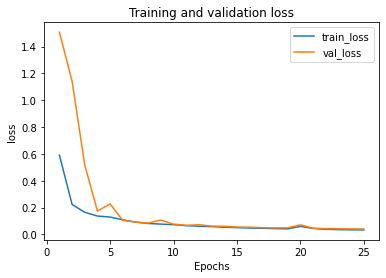

In [ ]:
plot_metric(history, 'loss')

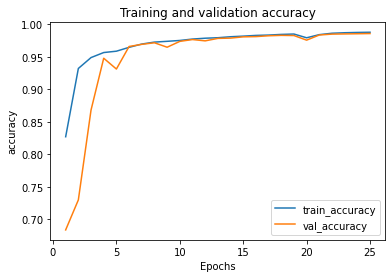

In [ ]:
plot_metric(history, 'accuracy')

In [ ]:
# model.save('carla-image-segmentation-model.h5')

In [ ]:
# Load our model
model = load_model('carla-image-segmentation-model.h5')

In [ ]:
# Compute Model Accuracy

train_loss, train_accuracy = model.evaluate(train_dataset, batch_size = 32)
validation_loss, validation_accuracy = model.evaluate(validation_dataset, batch_size = 32)
test_loss, test_accuracy = model.evaluate(test_dataset, batch_size = 32)

16/16 [==============================] - 105s 123ms/step - loss: 0.0404 - accuracy: 0.9860


In [ ]:
print(f'Model Accuracy on the Training Dataset: {round(train_accuracy * 100, 2)}%')
print(f'Model Accuracy on the Validation Dataset: {round(validation_accuracy * 100, 2)}%')
print(f'Model Accuracy on the Test Dataset: {round(test_accuracy * 100, 2)}%')

Model Accuracy on the Training Dataset: 98.81%
Model Accuracy on the Validation Dataset: 98.58%
Model Accuracy on the Test Dataset: 98.6%


In [ ]:
# Create Segmentations/Masks of Images in our Dataset
def create_mask(dataset, model):
    true_masks, predicted_masks = [], []
    for images, masks in dataset:
        pred_masks = model.predict(images)
        pred_masks = tf.expand_dims(tf.argmax(pred_masks, axis=-1), axis=-1)
        true_masks.extend(masks)
        predicted_masks.extend(pred_masks)
        
    true_masks = np.array(true_masks)
    predicted_masks = np.array(predicted_masks)
        
    return true_masks, predicted_masks    

In [ ]:
true_train_masks, predicted_train_masks = create_mask(train_dataset, model)
true_validation_masks, predicted_validation_masks = create_mask(validation_dataset, model)
true_test_masks, predicted_test_masks = create_mask(test_dataset, model)

In [ ]:
# Evaluate Predicted Segmentations
def evaluate_model(true_masks, predicted_masks, n_classes, smooth = 1e-6):
    
    """
    Evaluates semantic segmentation model
    
    Argument:
        true_masks: ground truth segmentations
        predicted_masks: predicted segmentations
        n_classes: number of segmentation classes
        smooth: a minute float digit added to denominators to avoid error from a zero division
    
    Returns:
        class_wise_evaluations: a dictionary containing evaluation metric 
                                outputs the for each segmentation class 
        overall_evaluations: a dictionary containing evaluation metric 
                             outputs the for all segmentation classes
        """
    # Create empty lists to store evaluation metric outputs
    class_wise_true_positives, class_wise_true_negatives = [],[]
    class_wise_false_positives, class_wise_false_negatives = [],[]
    class_wise_precisions, class_wise_recalls = [],[] 
    class_wise_specificities, class_wise_ious = [],[] 
    class_wise_tdrs, class_wise_f1_scores = [],[]
    classes = []
            
    for clas in range(n_classes):
        true_positives, true_negatives, false_positives, false_negatives = 0,0,0,0
        precisions, recalls, specificities, ious, f1_scores, tdrs = 0,0,0,0,0,0        
        
        number_of_masks = true_masks.shape[0]
        
        for mask_id in range(number_of_masks):
            true_positive = np.sum(np.logical_and(true_masks[mask_id]==clas, predicted_masks[mask_id]==clas))
            true_negative = np.sum(np.logical_and(true_masks[mask_id]!=clas, predicted_masks[mask_id]!=clas))
            false_positive = np.sum(np.logical_and(true_masks[mask_id]!=clas, predicted_masks[mask_id]==clas))
            false_negative = np.sum(np.logical_and(true_masks[mask_id]==clas, predicted_masks[mask_id]!=clas))
            
            true_positives += true_positive
            true_negatives += true_negative
            false_positives += false_positive
            false_negatives += false_negative

        recall = round(true_positives/(true_positives + false_negatives + smooth), 2)
        precision = round(true_positives/(true_positives + false_positives + smooth), 2)
        specificity = round(true_negatives/(true_negatives + false_positives + smooth), 2)
        tdr = round((1 - (false_negatives/(true_positives + false_negatives + smooth))), 2)
        iou = round(true_positives/(true_positives + false_negatives + false_positives + smooth), 2)
        f1_score = round((2 * precision * recall)/(precision + recall + smooth), 2)
        
        class_wise_true_positives.append(true_positives)
        class_wise_true_negatives.append(true_negatives)
        class_wise_false_positives.append(false_positives)
        class_wise_false_negatives.append(false_negatives)
        class_wise_recalls.append(recall)
        class_wise_precisions.append(precision)
        class_wise_specificities.append(specificity)
        class_wise_ious.append(iou)
        class_wise_tdrs.append(tdr)
        class_wise_f1_scores.append(f1_score)
        classes.append("Class " + str(clas+1))
        # class_wise_pixel_accuracies.append(pixel_accuracy)
        
    total_true_positives = np.sum(class_wise_true_positives)
    total_true_negatives = np.sum(class_wise_true_negatives)
    total_false_positives = np.sum(class_wise_false_positives)
    total_false_negatives = np.sum(class_wise_false_negatives)
    mean_recall = round(np.average(np.array(class_wise_recalls)), 2)
    mean_precision = round(np.average(np.array(class_wise_precisions)), 2)
    mean_specificity = round(np.average(np.array(class_wise_specificities)), 2)
    mean_iou = round(np.average(np.array(class_wise_ious)), 2)
    mean_tdr = round(np.average(np.array(class_wise_tdrs)), 2)
    mean_f1_score = round(np.average(np.array(class_wise_f1_scores)), 2)    
         
    class_wise_evaluations = {"Class": classes,
                              "True Positive Pixels": class_wise_true_positives,
                              "True Negative Pixels": class_wise_true_negatives,
                              "False Positive Pixels": class_wise_false_positives,
                              "False Negative Pixels": class_wise_false_negatives,
                              "Recall": class_wise_recalls,
                              "Precision": class_wise_precisions,
                              "Specificity": class_wise_specificities,
                              "IoU": class_wise_ious,
                              "TDR": class_wise_tdrs,
                              "F1-Score": class_wise_f1_scores}

    overall_evaluations = {"Class": "All Classes",
                        "True Positive Pixels": total_true_positives,
                        "True Negative Pixels": total_true_negatives,
                        "False Positive Pixels": total_false_positives,
                        "False Negative Pixels": total_false_negatives,
                        "Recall": mean_recall,
                        "Precision": mean_precision,
                        "Specificity": mean_specificity,
                        "IoU": mean_iou,
                        "TDR": mean_tdr,
                        "F1-Score": mean_f1_score}
    
    evaluations = {"Overall Evaluations": overall_evaluations, 
                   "Class-wise Evaluations": class_wise_evaluations}
    
    return evaluations

In [ ]:
import pandas as pd

In [ ]:
def show_evaluations(evaluations, 
                     metrics=["Recall", "Precision", "Specificity", "IoU", "TDR", "F1-Score"], 
                     class_list=None,
                     display_evaluations="All"):
    """
    Returns a pandas dataframe containing specified metrics
        
        Arguments:
            evaluations: evaluation output from the evaluate_model function
            metrics: a list containing one or more of the following metrics:
                     'True Positive', 'True Negative', 'False Positive', 'False Negative',
                     'Recall', 'Precision', 'Specificity', 'F1 Score', 'IoU', 'TDR'
            display_evaluations: one of 'All' to display both overall and class-wise evaluations,
                                 'Overall' to display only the overall evaluations,
                                 'Class-wise' to display only the classwise evaluations.
            class_list: list or tuple containing names of segmentation class.
    """
    
    # Split evaluations into overall and class-wise evaluations
    overall_evaluations = evaluations["Overall Evaluations"]
    class_wise_evaluations = evaluations["Class-wise Evaluations"]
    
    # Validate list of metrics 
    for metric_id in range(len(metrics)):
        metric = metrics[metric_id]
        if metric not in overall_evaluations:
            raise ValueError("'metrics argument' not properly defined. "
                            "Kindly create a list containing one or more of the following metrics: "
                             "'True Positive', 'True Negative', 'False Positive', 'False Negative', "
                             "'Recall', 'Precision', 'Specificity', 'F1-Score', 'IoU', 'TDR'") 
    
    # Check if class_list is none
    if class_list != None and all(isinstance(class_, str) for class_ in class_list):
        if len(class_list) == len(class_wise_evaluations["Class"]):
            class_list = [class_list]
        else:
            raise ValueError("class_list argument' not properly defined. " 
                             "List is either shorter or longer than segmentation classes") 
    else:
        class_list = [class_wise_evaluations["Class"]]                             
    
    # Extract data from the evaluations
    overall_data = [overall_evaluations["Class"]] + [overall_evaluations[metrics[metric_id]] for metric_id in range(len(metrics))]
    classwise_data = class_list + [class_wise_evaluations[metrics[metric_id]] for metric_id in range(len(metrics))]
    overall_data = np.array(overall_data).reshape(1,-1)
    classwise_data = np.array(classwise_data).transpose()
    
    # Determine the type of evaluation report to display
    if display_evaluations.lower() == "all":
        data = np.concatenate((overall_data, classwise_data), axis=0)
    elif display_evaluations.lower() == "overall":
        data = overall_data
    elif display_evaluations.lower() == "class-wise" or "classwise":
        data = classwise_data
    else:
        raise ValueError("Display argument are not properly defined."
                        "Kindly use 'All' to display both overall and class-wise evaluations."
                        "Use 'Overall' to display only the overall evaluations."
                        "Or use 'Class-wise' to display only the class-wise evaluations")

    
    # Create evaluation report as a pandas dataframe
    dataframe = pd.DataFrame(data)
    dataframe_titles = ["Class"] + metrics
    dataframe.columns = dataframe_titles
    # dataframe = dataframe.set_index(dataframe_titles[0], col_level=1)
    
    return dataframe

In [ ]:
# Evaluate predicted segmentations of the training images

LIST_OF_TAGS = ['Unlabeled', 'Building', 'Fence', 'Other', 
                             'Pedestrian', 'Pole', 'RoadLine', 'Road', 'SideWalk',
                             'Vegetation', 'Vehicles', 'Wall', 'TrafficSign']
                            #  'Sky', 'Ground', 'Bridge', 'RailTrack', 'GuardRail',
                            #  'TrafficLight', 'Static', 'Dynamic', 'Water', 'Terrain']

model_evaluation_on_train_dataset = evaluate_model(true_train_masks, predicted_train_masks, n_classes=n_classes_1)

show_evaluations(model_evaluation_on_train_dataset, 
                 metrics=["Recall", "Precision", "Specificity", "IoU", "TDR", "F1-Score"], 
                 class_list=LIST_OF_TAGS, 
                 display_evaluations="All")

Class Recall Precision Specificity   IoU   TDR F1-Score
0   All Classes   0.91      0.94         1.0  0.88  0.91     0.92
1     Unlabeled    1.0      0.99         1.0  0.99   1.0     0.99
2      Building   0.99      0.98         1.0  0.97  0.99     0.98
3         Fence   0.87      0.91         1.0  0.81  0.87     0.89
4         Other   0.92      0.88         1.0  0.82  0.92      0.9
5    Pedestrian   0.48      0.78         1.0  0.42  0.48     0.59
6          Pole   0.88      0.94         1.0  0.83  0.88     0.91
7      RoadLine   0.98      0.99         1.0  0.97  0.98     0.98
8          Road    1.0       1.0         1.0   1.0   1.0      1.0
9      SideWalk   0.99      0.99         1.0  0.97  0.99     0.99
10   Vegetation   0.97      0.98         1.0  0.95  0.97     0.97
11     Vehicles    1.0       1.0         1.0  0.99   1.0      1.0
12         Wall   0.96      0.91         1.0  0.88  0.96     0.93
13  TrafficSign   0.85      0.91         1.0  0.79  0.85     0.88

In [ ]:
# Evaluate predicted segmentations of the validation images
model_evaluation_on_validation_dataset = evaluate_model(true_validation_masks, predicted_validation_masks, n_classes=13)

show_evaluations(model_evaluation_on_validation_dataset, 
                 metrics=["Recall", "Precision", "Specificity", "IoU", "TDR", "F1-Score"], 
                 class_list=LIST_OF_TAGS, 
                 display_evaluations="All")

Class Recall Precision Specificity   IoU   TDR F1-Score
0   All Classes   0.88      0.92         1.0  0.84  0.88     0.89
1     Unlabeled   0.99      0.99         1.0  0.99  0.99     0.99
2      Building   0.98      0.97         1.0  0.95  0.98     0.97
3         Fence   0.86       0.9         1.0  0.78  0.86     0.88
4         Other   0.89      0.87         1.0  0.78  0.89     0.88
5    Pedestrian   0.29      0.58         1.0  0.24  0.29     0.39
6          Pole    0.8      0.91         1.0  0.75   0.8     0.85
7      RoadLine   0.98      0.99         1.0  0.97  0.98     0.98
8          Road    1.0       1.0         1.0  0.99   1.0      1.0
9      SideWalk   0.98      0.98         1.0  0.97  0.98     0.98
10   Vegetation   0.97      0.98         1.0  0.95  0.97     0.97
11     Vehicles    1.0       1.0         1.0  0.99   1.0      1.0
12         Wall   0.94      0.89         1.0  0.84  0.94     0.91
13  TrafficSign   0.78      0.89         1.0  0.71  0.78     0.83

In [ ]:
# Evaluate predicted segmentations of the test images
model_evaluation_on_test_dataset = evaluate_model(true_test_masks, predicted_test_masks, n_classes=13)

show_evaluations(model_evaluation_on_test_dataset, 
                 metrics=["Recall", "Precision", "Specificity", "IoU", "TDR", "F1-Score"], 
                 class_list=LIST_OF_TAGS, 
                 display_evaluations="All")

Class Recall Precision Specificity   IoU   TDR F1-Score
0   All Classes   0.88      0.93         1.0  0.84  0.88      0.9
1     Unlabeled   0.99      0.99         1.0  0.99  0.99     0.99
2      Building   0.98      0.97         1.0  0.96  0.98     0.97
3         Fence   0.86       0.9         1.0  0.79  0.86     0.88
4         Other   0.88      0.86         1.0  0.77  0.88     0.87
5    Pedestrian    0.3      0.67         1.0  0.26   0.3     0.41
6          Pole   0.81      0.91         1.0  0.75  0.81     0.86
7      RoadLine   0.98      0.99         1.0  0.97  0.98     0.98
8          Road    1.0       1.0         1.0  0.99   1.0      1.0
9      SideWalk   0.98      0.98         1.0  0.97  0.98     0.98
10   Vegetation   0.97      0.98         1.0  0.95  0.97     0.97
11     Vehicles    1.0       1.0         1.0  0.99   1.0      1.0
12         Wall   0.94       0.9         1.0  0.86  0.94     0.92
13  TrafficSign   0.78      0.89         1.0  0.71  0.78     0.83

In [ ]:
# Create functions to preprocess selected images and display their true state, true mask and predicted mask

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define a function to create new masks using our model
def create_mask_for_plot(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = tf.expand_dims(pred_mask, axis=-1)
    
    return pred_mask[0]

# Define a function to display outputs of this process: an input image, its true mask, and its predicted mask
def display(display_list, label_map):
    plt.figure(figsize=(18, 18))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        if i >= 1:
            plt.subplot(1, len(display_list), i + 1)
            plt.title(title[i])
            used_classes = np.unique(display_list[i])

            im = plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))            
            patches_1 = [mpatches.Patch(color=im.cmap(im.norm(int(cls))), label="{}".format(label_map[int(cls)])) for cls in used_classes]
            # put those patched as legend-handles into the legend
            plt.legend(handles=patches_1, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            plt.axis("off")         
        else:
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))        
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Define a function to select images from a specified dataset and return the images, their true masks and their predicted masks
def show_predictions(dataset, model, label_map, num):
    """
    Displays the first image of each of the num batches
    """
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask_for_plot(pred_mask)], label_map)

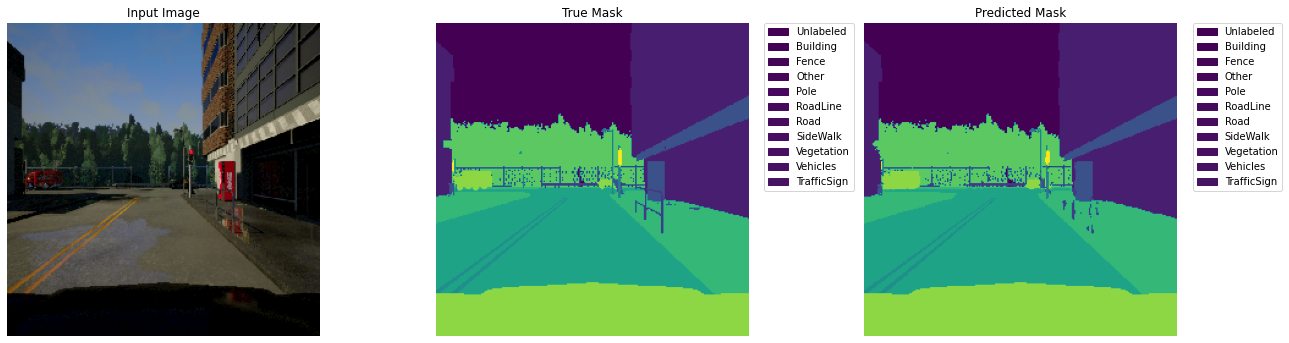

In [ ]:
# Predict and compare masks of images in the training set

show_predictions(train_dataset, model, label_map, 1)

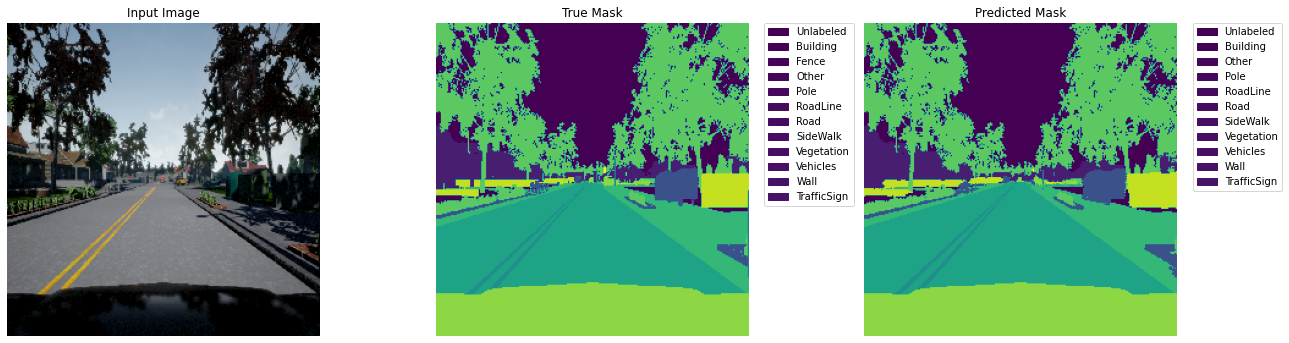

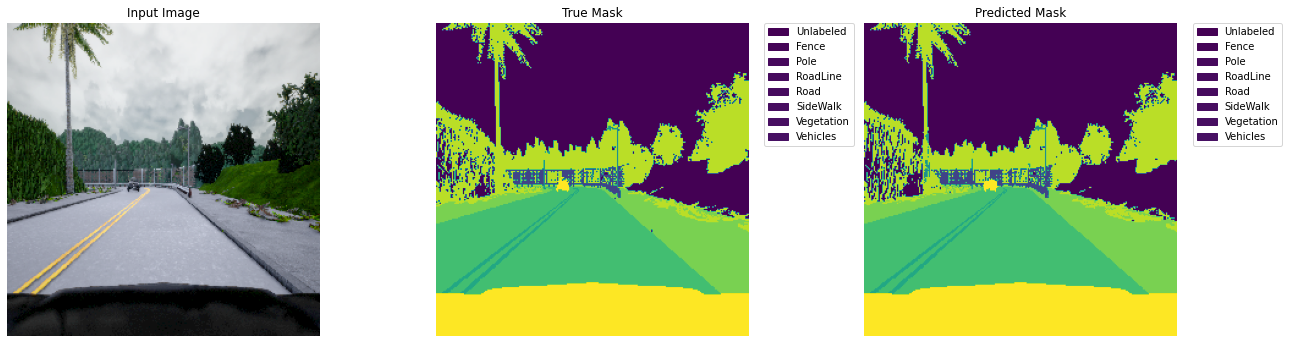

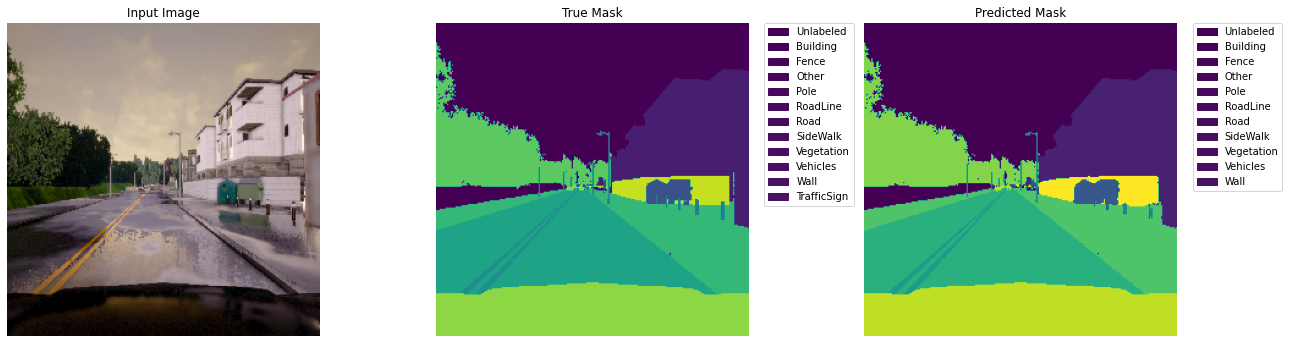

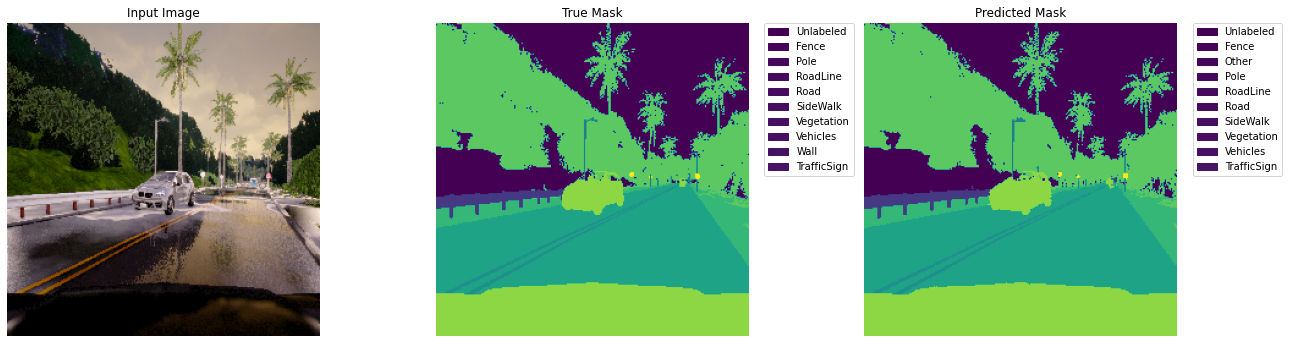

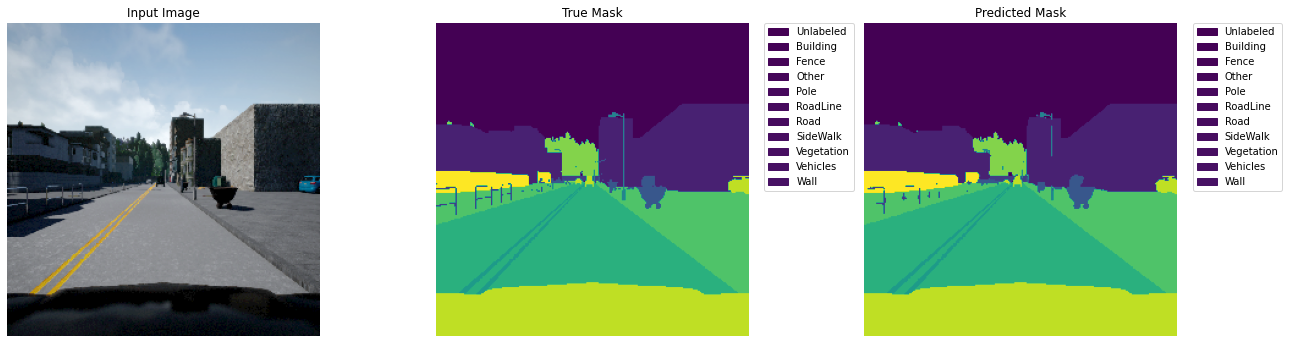

In [ ]:
# Predict and compare masks of images in the training set

show_predictions(train_dataset, model, label_map, 5)

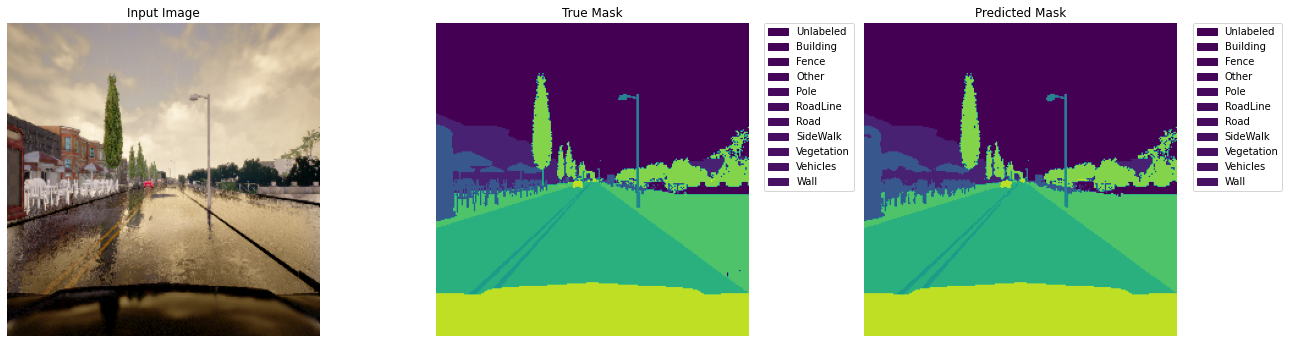

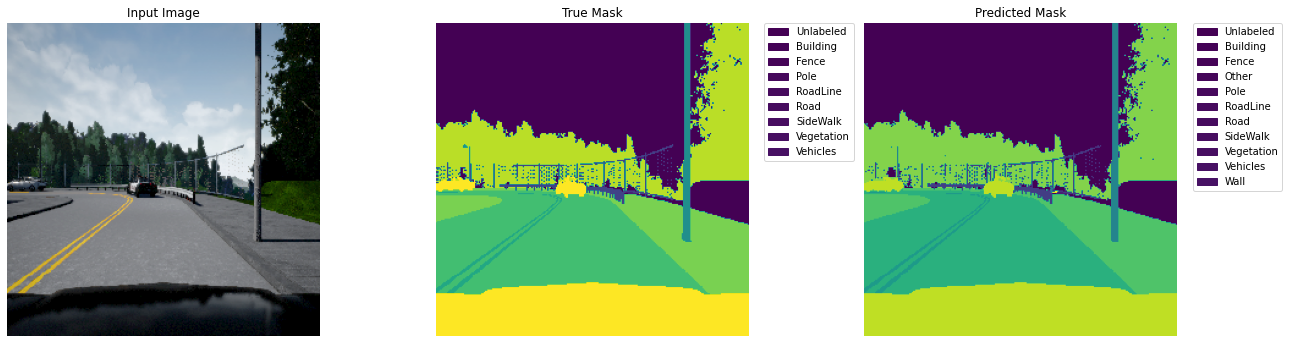

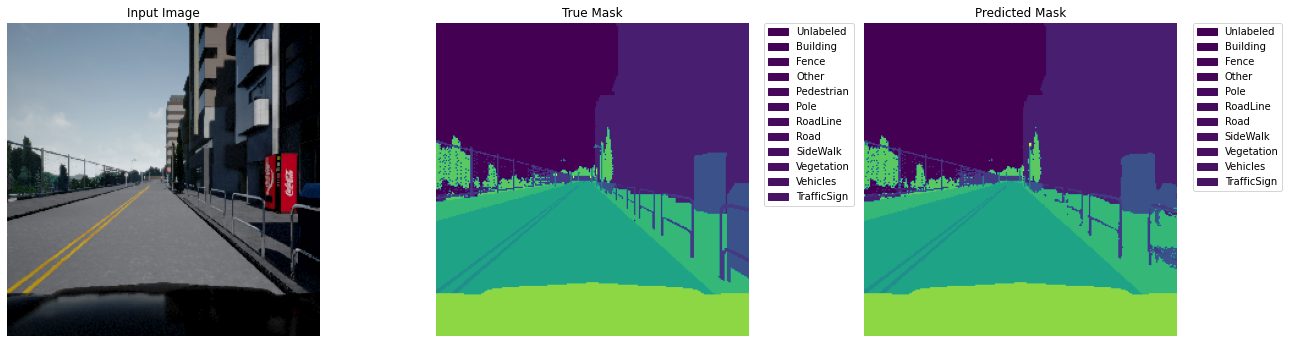

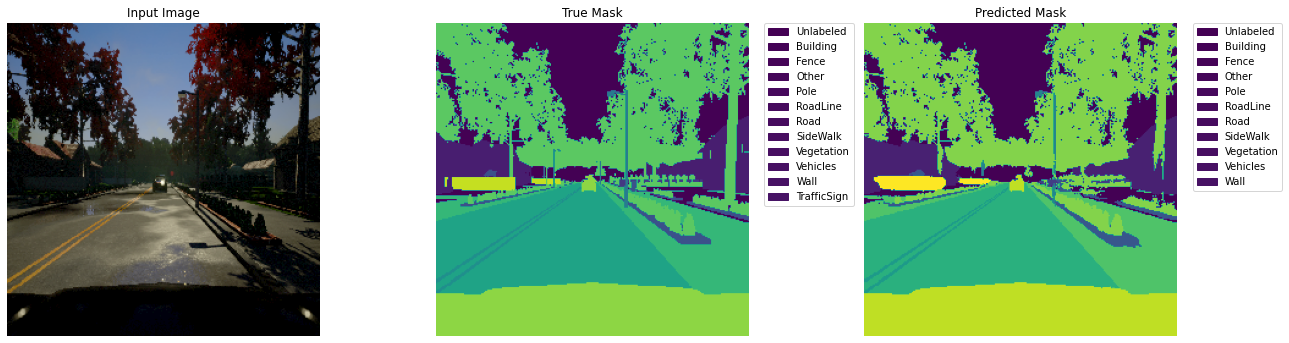

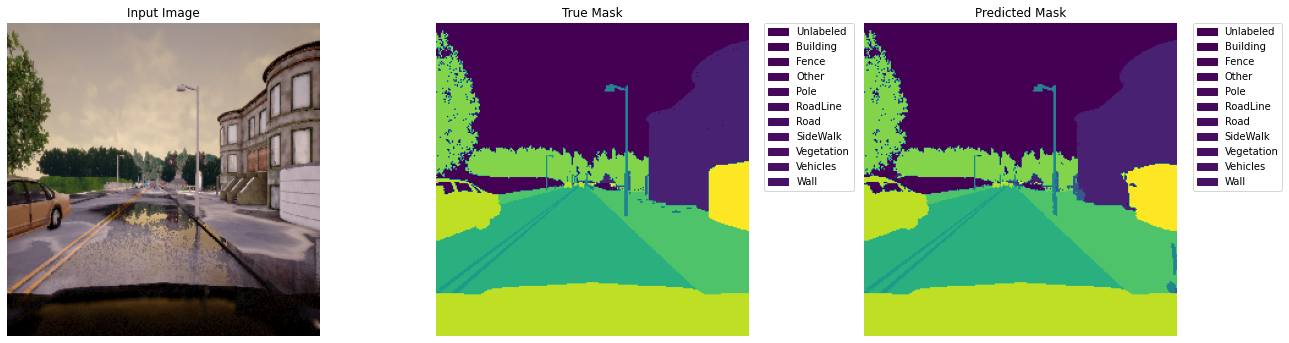

In [ ]:
# Predict and compare masks of images in the validation set

show_predictions(validation_dataset, model, label_map, 5)

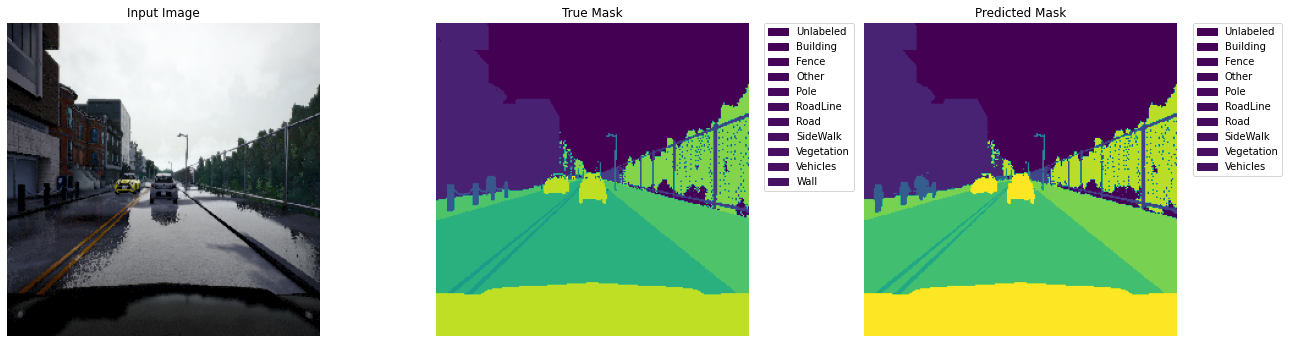

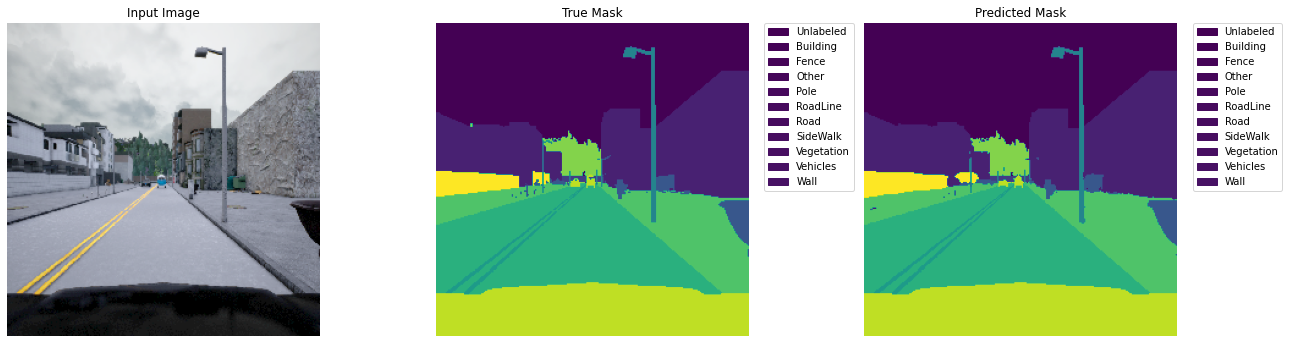

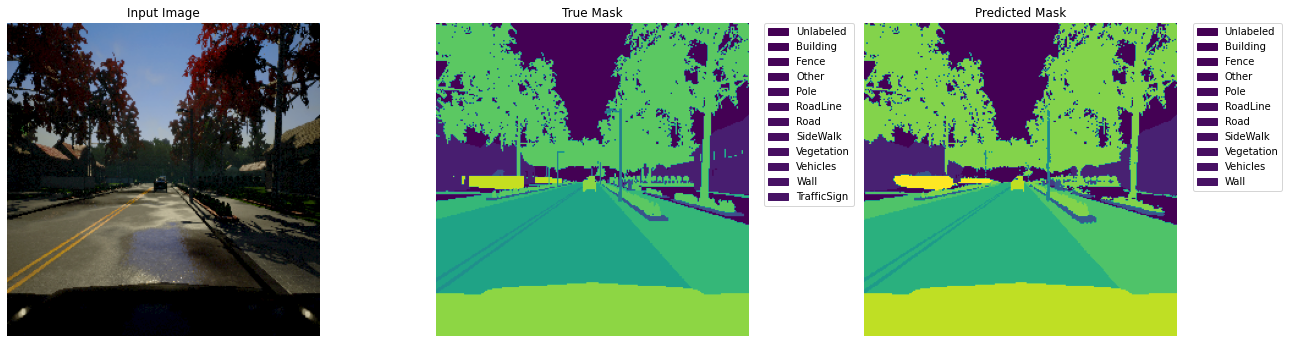

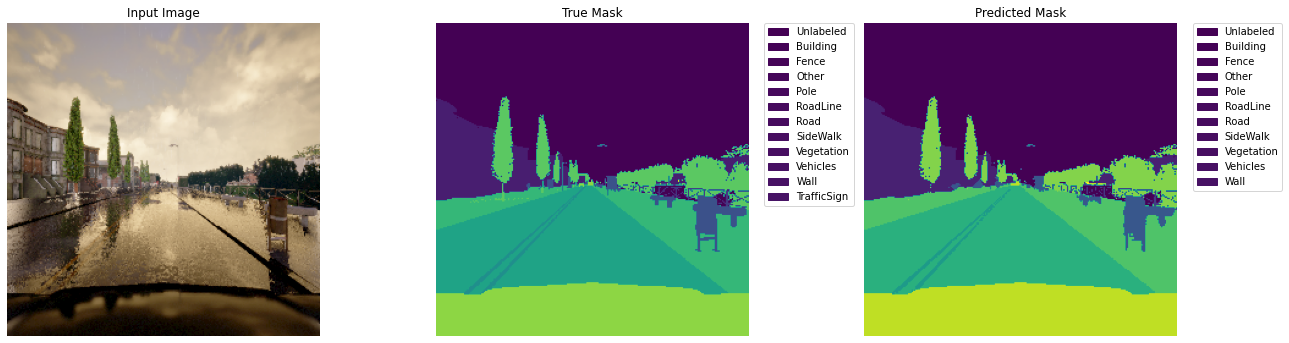

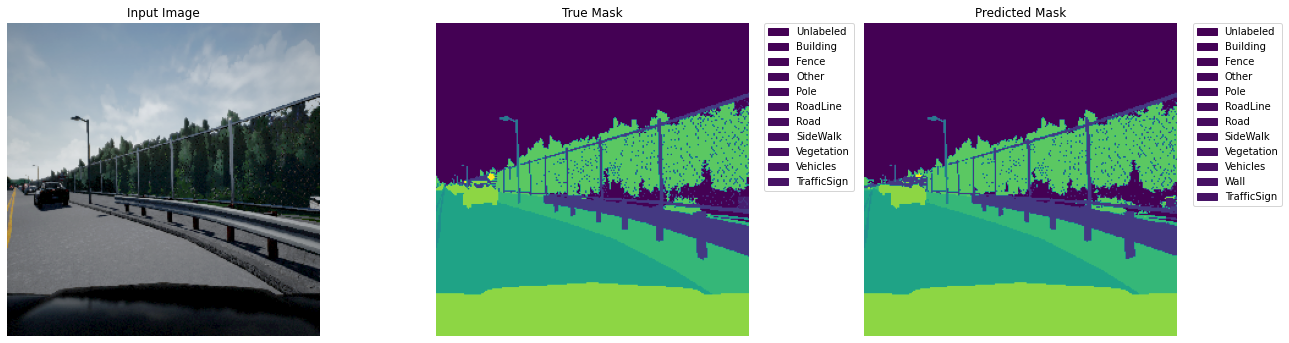

In [ ]:
# Predict and compare masks of images in the test set

show_predictions(test_dataset, model, label_map, 5)

In [ ]:
# !git clone https://github.com/sadeepj/crfasrnn_keras.git

In [ ]:
# %cd crfasrnn_keras

In [ ]:
# !git branch -a

In [ ]:
# !git checkout gpu_support

In [ ]:
# %pip install -r requirements_gpu.txt

In [ ]:
# %cd src/cpp

You can install *GNU make* (https://www.gnu.org/software/make/) with *chocolatey* (https://chocolatey.org/install), a well-maintained package manager, which will add make to the global path and runs on all CLIs (powershell, git bash, cmd, etc…) saving you a ton of time in both maintenance and initial setup to get make running.

1. Install the *chocolatey package manager* for **Windows** (https://chocolatey.org/install) compatible to Windows 7+ / Windows Server 2003+

2. Run `choco install make`

In [ ]:
# %cd "/content/gdrive/MyDrive/ITC Data Science Course/Course/Final Project/Kaggle Datasets/Semantic Segmentation for Self Driving Cars/crfasrnn_keras/src/cpp"

In [ ]:
# !make

In [ ]:
# %ls

https://www.tensorflow.org/addons/api_docs/python/tfa/text/CRFModelWrapper

https://github.com/howl-anderson/addons/blob/add_crf_tutorial/docs/tutorials/layers_crf.ipynb

In [ ]:
# %pip install tensorflow-addons

In [ ]:
# from crfrnn_layer import CrfRnnLayer

# def add_crf_layer(original_model):
#     original_model.trainable = False

#     crf_layer = CrfRnnLayer(image_dims=(224, 224),
#                             num_classes=2,
#                             theta_alpha=3.,
#                             theta_beta=160.,
#                             theta_gamma=3.,
#                             num_iterations=10,
#                             name='crfrnn')([original_model.outputs[0], original_model.inputs[0]])

#     new_crf_model = tf.keras.Model(inputs = original_model.input, outputs = crf_layer)

#     return(new_crf_model)